<font face="B Mitra" size=4>
<div dir=rtl align=center>
<br>
<img src="https://aut.ac.ir/templates/tmpl_modern01/images/logo_fa.png" alt="Amirkabir University Logo" width="100">
<br>
<font size=6>
<b>پروژه اول داده کاوی</b>
<br>
<font size=5> استاد درس: دکتر فاطمه شاکری
<br>
<font size=5> طراحان پروژه: مهدی غیاثی، سینا ارزبین
<br>
<font size=4> پاییز ۱۴۰۳
<hr>
</div>
</font>

<font face="B Nazanin">
<div dir=rtl>
<p align="justify">
<font size=5><font color='#eb4034'>
توجه داشته باشید علاوه بر پیاده سازی خواسته شده، توضیحات لازم در محل تعریف شده را بیان کنید.
</p>
</font>
</div>
</font>

<div dir=rtl>
<h2>
<font face="B Nazanin" color="#0099cc">
بارگذاری کتابخانه های مورد نیاز

<font face="B Nazanin">
<div dir=rtl>
<p align="justify">
<font size=4><font color='#eb4034'>
شما تنها مجاز به استفاده از کتابخانه‌های import شده در سلول زیر هستید.
</p>
</font>
</div>
</font>

In [178]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# برای رسم نمودار‌های واضح‌تر، خط زیر را آنکامنت کنید
# %config InlineBackend.figure_formats = ['svg']

<div dir=rtl>
<h2>
<font face="B Nazanin" color="#0099cc">
بارگذاری مجموعه داده

In [179]:
data = pd.read_csv("apartment_rent.csv")
data.head(5)

,title,amenities,bathrooms,bedrooms,fee,has_photo,pets_allowed,price,square_feet,cityname,state,latitude,longitude,source,time
0,Thomas Ninke Senior Village,"AC,Cable or Satellite,Clubhouse,Dishwasher,Gat...",1.0,1.0,No,Thumbnail,"Cats,Dogs",337.0,617,Victoria,TX,28.696040,-97.164089,RentDigs.com,1547715453
1,"Average Rent $1,284 a month - That's a STEAL. ...","Parking,Patio/Deck,Pool,Washer Dryer",1.0,1.0,No,Yes,"Cats,Dogs",1284.0,728,Dallas,TX,32.851338,-96.817635,RentDigs.com,1568757960
2,Super Cute! Apartment for Rent. $923/mo,"Fireplace,Gym,Pool,Tennis,Washer Dryer",1.0,1.0,No,Thumbnail,"Cats,Dogs",923.0,510,Richmond,VA,37.530061,-77.476208,RentDigs.com,1568744171
3,Apartment in move in condition in Loganville,NaN,2.0,4.0,No,Yes,NaN,1595.0,1950,Loganville,GA,33.795894,-83.877143,RentDigs.com,1568777003
4,"$2,000 / Three BR - Great Deal. MUST SEE!","Dishwasher,Garbage Disposal,Parking,Refrigerat...",2.0,3.0,No,Yes,"Cats,Dogs",2000.0,1600,Chicago,IL,42.005037,-87.681448,RentDigs.com,1544237300


<div dir=rtl>
<h2>
<font face="B Nazanin" color="#0099cc">
پیش پردازش
</font>
</h2>

<div dir=rtl>
<font face="B Nazanin" size=4>
ابعاد داده را چاپ کنید.
</font>
</p>



In [180]:
print("Dimensions of the DataFrame:", data.shape)

Dimensions of the DataFrame: (99788, 15)



<div dir=rtl>
<font face="B Nazanin" size=4>
رکوردهای تکراری را در مجموعه داده بررسی کنید و درصورت نیاز حذف کنید.
</font>
</p>

In [181]:
# show duplicates
print('Number of duplicates:', data.duplicated().sum())

Number of duplicates: 86


In [182]:
# if there are duplicates, drop them
data = data.drop_duplicates()
data.shape

(99702, 15)

<div dir=rtl>
<font face="B Nazanin" size=4>
در حال حاضر ویژگی <code>title</code> ارزش اطلاعاتی ندارد، این ستون را حذف کنید.

</font>
</p>

In [183]:
data = data.drop('title', axis=1)
data.head()

,amenities,bathrooms,bedrooms,fee,has_photo,pets_allowed,price,square_feet,cityname,state,latitude,longitude,source,time
0,"AC,Cable or Satellite,Clubhouse,Dishwasher,Gat...",1.0,1.0,No,Thumbnail,"Cats,Dogs",337.0,617,Victoria,TX,28.696040,-97.164089,RentDigs.com,1547715453
1,"Parking,Patio/Deck,Pool,Washer Dryer",1.0,1.0,No,Yes,"Cats,Dogs",1284.0,728,Dallas,TX,32.851338,-96.817635,RentDigs.com,1568757960
2,"Fireplace,Gym,Pool,Tennis,Washer Dryer",1.0,1.0,No,Thumbnail,"Cats,Dogs",923.0,510,Richmond,VA,37.530061,-77.476208,RentDigs.com,1568744171
3,NaN,2.0,4.0,No,Yes,NaN,1595.0,1950,Loganville,GA,33.795894,-83.877143,RentDigs.com,1568777003
4,"Dishwasher,Garbage Disposal,Parking,Refrigerat...",2.0,3.0,No,Yes,"Cats,Dogs",2000.0,1600,Chicago,IL,42.005037,-87.681448,RentDigs.com,1544237300


<div dir=rtl>
<font face="B Nazanin" size=4>
 مقادیر گمشده را در مجموعه داده بررسی کنید.
</font>
</p>

In [184]:
nan_counts = data.isna().sum()

# Print the number of NaNs in each column
print("Number of NaN values in each column:")
print(nan_counts)

Number of NaN values in each column:
amenities       16049
bathrooms          61
bedrooms          122
fee                 0
has_photo           0
pets_allowed    60544
price               1
square_feet         0
cityname          302
state             302
latitude           25
longitude          25
source              0
time                0
dtype: int64


<div dir=rtl>
<h4>
<font face="B Nazanin">
<b>مدیریت مقادیر گم‌شده</b>
</font>
</h4>
<div dir=rtl>
<font face="B Nazanin" size=4>
ستون <code>amenities</code> که نشان‌دهنده‌ی امکانات رفاهی خانه‌ها است، مقادیر گم‌‌شده‌ی بسیار زیادی دارد. 
در مورد این ویژگی خاص، نمی‌توان قضاوت نمود که آیا مقادیر واقعا گم‌شده هستند یا اینکه هیچ‌گونه امکانات رفاهی برای یک آگهی ثبت نشده است.
به هر حال مقادیر گم‌شده این ویژگی را با مقدار <code>'none advertised'</code> جایگزین کنید.
<br>
ستون <code>pets_allowed</code> نیز وضعیت مشابهی با ستون <code>amenities</code> دارد. مقادیر گم‌شده این ستون را با مقدار پیش‌فرض <code>No</code>
جایگزین کنید.  </font>
</p>

In [185]:
data["amenities"] = data["amenities"].fillna("none advertised")
data["pets_allowed"] = data["pets_allowed"].fillna("no")
nan_counts = data.isna().sum()

# Print the number of NaNs in each column
print("Number of NaN values in each column:")
print(nan_counts)


Number of NaN values in each column:
amenities         0
bathrooms        61
bedrooms        122
fee               0
has_photo         0
pets_allowed      0
price             1
square_feet       0
cityname        302
state           302
latitude         25
longitude        25
source            0
time              0
dtype: int64


In [186]:
data

,amenities,bathrooms,bedrooms,fee,has_photo,pets_allowed,price,square_feet,cityname,state,latitude,longitude,source,time
0,"AC,Cable or Satellite,Clubhouse,Dishwasher,Gat...",1.0,1.0,No,Thumbnail,"Cats,Dogs",337.0,617,Victoria,TX,28.696040,-97.164089,RentDigs.com,1547715453
1,"Parking,Patio/Deck,Pool,Washer Dryer",1.0,1.0,No,Yes,"Cats,Dogs",1284.0,728,Dallas,TX,32.851338,-96.817635,RentDigs.com,1568757960
2,"Fireplace,Gym,Pool,Tennis,Washer Dryer",1.0,1.0,No,Thumbnail,"Cats,Dogs",923.0,510,Richmond,VA,37.530061,-77.476208,RentDigs.com,1568744171
3,none advertised,2.0,4.0,No,Yes,no,1595.0,1950,Loganville,GA,33.795894,-83.877143,RentDigs.com,1568777003
4,"Dishwasher,Garbage Disposal,Parking,Refrigerat...",2.0,3.0,No,Yes,"Cats,Dogs",2000.0,1600,Chicago,IL,42.005037,-87.681448,RentDigs.com,1544237300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99783,"Clubhouse,Gym,Internet Access,Parking,Pool,Sto...",2.0,2.0,No,Yes,no,765.0,1053,Lynchburg,VA,37.333672,-79.218679,RentDigs.com,1550863545
99784,none advertised,1.0,1.0,No,Thumbnail,"Cats,Dogs",1245.0,635,Atlanta,GA,33.727126,-84.381276,RentDigs.com,1550829088
99785,"Gym,Pool,Storage",1.0,1.0,No,Thumbnail,no,2394.0,948,Arlington,VA,38.861943,-77.072875,RentDigs.com,1550839231
99786,none advertised,1.0,1.0,No,Thumbnail,"Cats,Dogs",1145.0,620,NaN,NaN,39.825470,-98.535754,RentLingo,1577017091


<div dir=rtl>
<font face="B Nazanin" size=4>
مقادیر گم‌شده ستون‌های <code>bathrooms</code> و <code>bedrooms</code> را قصد داریم با یکی از سه معیار آماری میانگین، میانه یا مد ستون‌ها پر کنیم.
<br>
</font>
</p>

<div dir=rtl>
<font face="B Nazanin" size=4>
به نظر شما کدام معیار آماری برای پر کردن مقادیر گم‌شده این ستون‌ها مناسب است؟ چرا؟
در ادامه با معیار گفته شده مقادیر گم‌شده را پر کنید.
<br>
</font>
</p>

In [187]:
bathrooms_mode = data["bathrooms"].mode()
bedrooms_mode = data["bedrooms"].mode()
print("bathrooms_mode: ", bathrooms_mode)
print("bedrooms_mode ", bedrooms_mode)
bathrooms_mean = data["bathrooms"].mean()
bedrooms_mean = data["bedrooms"].mean()
print("bathrooms_mean: ", bathrooms_mean)
print("bedrooms_mean ", bedrooms_mean)

bathrooms_mode:  0    1.0
Name: bathrooms, dtype: float64
bedrooms_mode  0    2.0
Name: bedrooms, dtype: float64
bathrooms_mean:  1.445188225730372
bedrooms_mean  1.7276963245631654


In [188]:
data["bathrooms"] = data["bathrooms"].fillna(data['bathrooms'].mode()[0])
data["bedrooms"] = data["bedrooms"].fillna(data["bedrooms"].mode()[0])
data

,amenities,bathrooms,bedrooms,fee,has_photo,pets_allowed,price,square_feet,cityname,state,latitude,longitude,source,time
0,"AC,Cable or Satellite,Clubhouse,Dishwasher,Gat...",1.0,1.0,No,Thumbnail,"Cats,Dogs",337.0,617,Victoria,TX,28.696040,-97.164089,RentDigs.com,1547715453
1,"Parking,Patio/Deck,Pool,Washer Dryer",1.0,1.0,No,Yes,"Cats,Dogs",1284.0,728,Dallas,TX,32.851338,-96.817635,RentDigs.com,1568757960
2,"Fireplace,Gym,Pool,Tennis,Washer Dryer",1.0,1.0,No,Thumbnail,"Cats,Dogs",923.0,510,Richmond,VA,37.530061,-77.476208,RentDigs.com,1568744171
3,none advertised,2.0,4.0,No,Yes,no,1595.0,1950,Loganville,GA,33.795894,-83.877143,RentDigs.com,1568777003
4,"Dishwasher,Garbage Disposal,Parking,Refrigerat...",2.0,3.0,No,Yes,"Cats,Dogs",2000.0,1600,Chicago,IL,42.005037,-87.681448,RentDigs.com,1544237300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99783,"Clubhouse,Gym,Internet Access,Parking,Pool,Sto...",2.0,2.0,No,Yes,no,765.0,1053,Lynchburg,VA,37.333672,-79.218679,RentDigs.com,1550863545
99784,none advertised,1.0,1.0,No,Thumbnail,"Cats,Dogs",1245.0,635,Atlanta,GA,33.727126,-84.381276,RentDigs.com,1550829088
99785,"Gym,Pool,Storage",1.0,1.0,No,Thumbnail,no,2394.0,948,Arlington,VA,38.861943,-77.072875,RentDigs.com,1550839231
99786,none advertised,1.0,1.0,No,Thumbnail,"Cats,Dogs",1145.0,620,NaN,NaN,39.825470,-98.535754,RentLingo,1577017091


In [189]:
nan_counts = data.isna().sum()

# Print the number of NaNs in each column
print("Number of NaN values in each column:")
print(nan_counts)

Number of NaN values in each column:
amenities         0
bathrooms         0
bedrooms          0
fee               0
has_photo         0
pets_allowed      0
price             1
square_feet       0
cityname        302
state           302
latitude         25
longitude        25
source            0
time              0
dtype: int64


<div dir=rtl>
<font face="B Nazanin">
<p align="justify">
<font size=4>
<b> <font color='#eb4034'> توضیحات پاسخ: </font></b>  برای این داده ها چون که داده هایمان گسسته هستند پس بهتر است یک مقدار گسسته در آن بگذاریم گرفتن میانه که اشتباه است سراغ مد و میانگین میریم برای اینکه ببینیم کدام بهتر است ابتدا هم میانگین و هم مد داده هارا حساب میکنیم میبینیم که نزدیک ترین عدد صحیح به میانگین داده ها همان مد آن ها میشود پس در اینجا بهتر است که از مد داده ها استفاده کنیم
</p>
</font>
</div>
</font>
<hr>

<div dir=rtl>
<font face="B Nazanin" size=4>
پس از آن سطرهایی که مقدار <code>cityname</code> یا <code>latitude</code> یا <code>price</code> آن‌ها خالی است را حذف کنید.
</font>
</p>

In [190]:
data = data.dropna(subset=["cityname", "latitude", "price"])

<div dir=rtl>
<font face="B Nazanin" size=4>
حال در صورتی که به درستی بخش‌های قبلی را انجام داده باشید، دیتافریم باید 99399 سطر داشته باشد و هیچ مقدار گم‌شده‌ای نداشته باشیم. با متد <code>()info</code> اطلاعات دیتافریم را بررسی کنید.
</font>
</p>

In [191]:

data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99399 entries, 0 to 99787
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   amenities     99399 non-null  object 
 1   bathrooms     99399 non-null  float64
 2   bedrooms      99399 non-null  float64
 3   fee           99399 non-null  object 
 4   has_photo     99399 non-null  object 
 5   pets_allowed  99399 non-null  object 
 6   price         99399 non-null  float64
 7   square_feet   99399 non-null  int64  
 8   cityname      99399 non-null  object 
 9   state         99399 non-null  object 
 10  latitude      99399 non-null  float64
 11  longitude     99399 non-null  float64
 12  source        99399 non-null  object 
 13  time          99399 non-null  int64  
dtypes: float64(5), int64(2), object(7)
memory usage: 11.4+ MB


<div dir=rtl>
<font face="B Nazanin" size=4>
ویژگی 
<code>time</code>
به فرمت Unix Time ذخیره شده است که نوع دادهٔ مناسبی برای تحلیل سایر ویژگی‌ها بر اساس تاریخ نیست.
ابتدا آن را به قالبی مناسب در آوردیم.
<br>

</font>
</p>

In [192]:
data['time'] = pd.to_datetime(data['time'], unit='s')
data.head()

/tmp/ipykernel_31973/2285960318.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['time'] = pd.to_datetime(data['time'], unit='s')


,amenities,bathrooms,bedrooms,fee,has_photo,pets_allowed,price,square_feet,cityname,state,latitude,longitude,source,time
0,"AC,Cable or Satellite,Clubhouse,Dishwasher,Gat...",1.0,1.0,No,Thumbnail,"Cats,Dogs",337.0,617,Victoria,TX,28.696040,-97.164089,RentDigs.com,2019-01-17 08:57:33
1,"Parking,Patio/Deck,Pool,Washer Dryer",1.0,1.0,No,Yes,"Cats,Dogs",1284.0,728,Dallas,TX,32.851338,-96.817635,RentDigs.com,2019-09-17 22:06:00
2,"Fireplace,Gym,Pool,Tennis,Washer Dryer",1.0,1.0,No,Thumbnail,"Cats,Dogs",923.0,510,Richmond,VA,37.530061,-77.476208,RentDigs.com,2019-09-17 18:16:11
3,none advertised,2.0,4.0,No,Yes,no,1595.0,1950,Loganville,GA,33.795894,-83.877143,RentDigs.com,2019-09-18 03:23:23
4,"Dishwasher,Garbage Disposal,Parking,Refrigerat...",2.0,3.0,No,Yes,"Cats,Dogs",2000.0,1600,Chicago,IL,42.005037,-87.681448,RentDigs.com,2018-12-08 02:48:20


<div dir=rtl>
<font face="B Nazanin" size=4>
هر یک از مقادیر روز هفته، ماه و سال را از ویژگی
<code>time</code>
استخراج کنید و در یک ستون جداگانه قرار دهید تا بتوانیم تحلیل هایی در ارتباط با تاریخ در ادامه انجام دهیم.
<br>
درنهایت ستون
<code>time</code>
را حذف کنید.

</font>
</p>

In [193]:
# extract the Year out of the date
data["day"] = data["time"].dt.day

# extract the month out of the date
data['month'] = data['time'].dt.month

# extract the day out of the date
data['year'] = data['time'].dt.year

# Drop the 'time' column
data.drop(columns=['time'], inplace=True)

data.head()

/tmp/ipykernel_31973/3720780477.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["day"] = data["time"].dt.day
/tmp/ipykernel_31973/3720780477.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['month'] = data['time'].dt.month
/tmp/ipykernel_31973/3720780477.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/us

,amenities,bathrooms,bedrooms,fee,has_photo,pets_allowed,price,square_feet,cityname,state,latitude,longitude,source,day,month,year
0,"AC,Cable or Satellite,Clubhouse,Dishwasher,Gat...",1.0,1.0,No,Thumbnail,"Cats,Dogs",337.0,617,Victoria,TX,28.696040,-97.164089,RentDigs.com,17,1,2019
1,"Parking,Patio/Deck,Pool,Washer Dryer",1.0,1.0,No,Yes,"Cats,Dogs",1284.0,728,Dallas,TX,32.851338,-96.817635,RentDigs.com,17,9,2019
2,"Fireplace,Gym,Pool,Tennis,Washer Dryer",1.0,1.0,No,Thumbnail,"Cats,Dogs",923.0,510,Richmond,VA,37.530061,-77.476208,RentDigs.com,17,9,2019
3,none advertised,2.0,4.0,No,Yes,no,1595.0,1950,Loganville,GA,33.795894,-83.877143,RentDigs.com,18,9,2019
4,"Dishwasher,Garbage Disposal,Parking,Refrigerat...",2.0,3.0,No,Yes,"Cats,Dogs",2000.0,1600,Chicago,IL,42.005037,-87.681448,RentDigs.com,8,12,2018


<div dir=rtl>
<h4>
<font face="B Nazanin">
<b>مدیریت داده‌های پرت</b>
</font>
</h4>

<div dir=rtl>
<font face="B Nazanin" size=4>
ممکن است خانه‌هایی بسیار بزرگ یا بسیار گران باشند یا برعکس، خانه‌‌هایی باشند که بیش از حد ارزان یا کوچک بوده و فاصله‌ی بسیاری با میانگین داشته‌ باشند. در بعضی امور تحلیل داده‌ای، داده‌های پرت می‌توانند نتایج را به نحو نامطلوب تحت تاثیر قرار دهند.
برای مثال، داده‌های پرت می‌توانند باعث غلط‌انداز و یا نامفهوم شدن نمودار‌ها شوند و یا الگوریتم‌های یادگیری ماشین را به اشتباه بیاندازند.
در این قسمت، بعضی از خانه‌هایی که یک یا چند ویژگی پرت یا غیرمعمول دارند را حذف می‌کنیم.
</font>
</p>

<div dir=rtl>
<font face="B Nazanin" size=4>
یکی از روش‌های شناسایی و حذف داده‌های پرت، استفاده از چارک‌ها و نمودار جعبه‌ای می‌باشد.
پس ابتدا نمودار جعبه‌ای ستون قیمت را رسم کنید.
</font>
</p>

<AxesSubplot: >

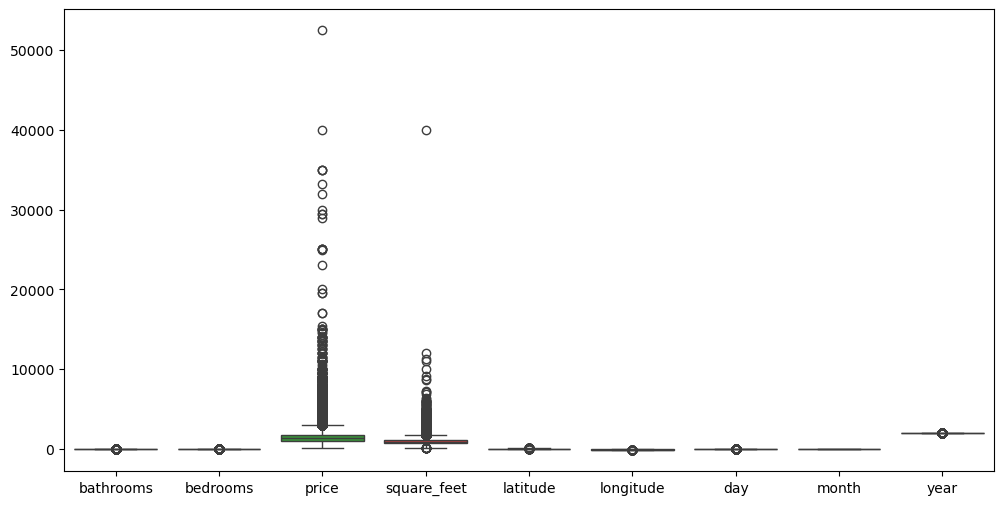

In [194]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=data)

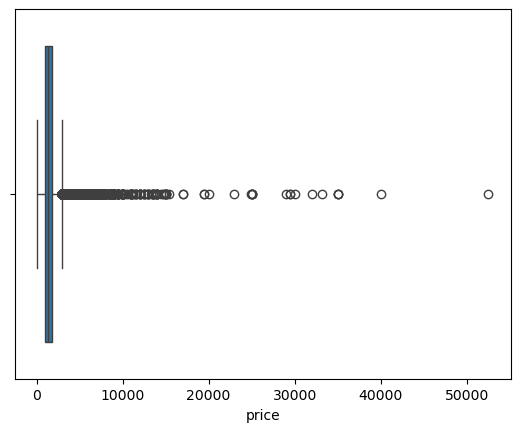

In [195]:
sns.boxplot(x=data["price"])
plt.show()


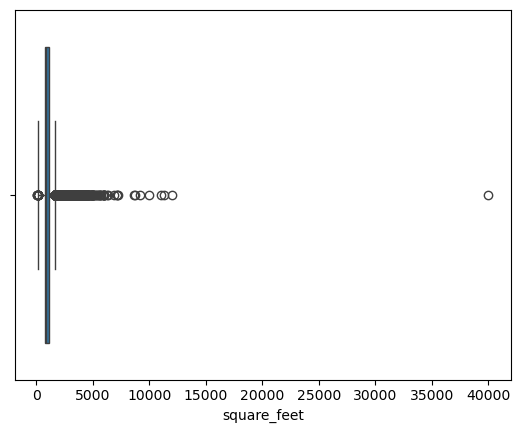

In [196]:
sns.boxplot(x=data["square_feet"])
plt.show()

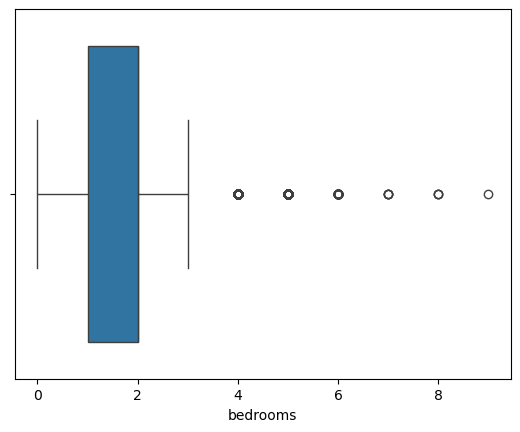

In [197]:
sns.boxplot(x=data["bedrooms"])
plt.show()

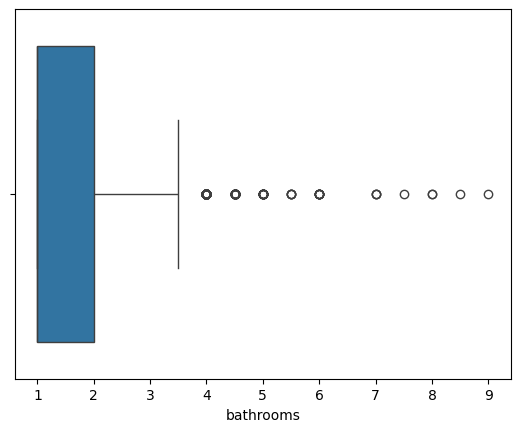

In [198]:
sns.boxplot(x=data["bathrooms"])
plt.show()

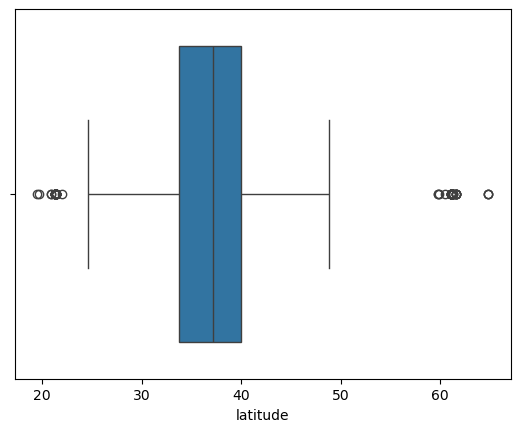

In [199]:
sns.boxplot(x=data["latitude"])
plt.show()

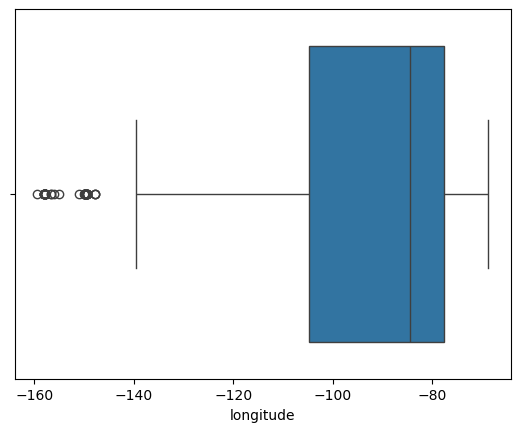

In [200]:
sns.boxplot(x=data["longitude"])
plt.show()

<div dir=rtl>
<font face="B Nazanin" size=4>
در صورتی که نمودار را به درستی رسم کرده باشید مشاهده خواهید کرد که بعضی از داده‌ها آنقدر پرت هستند که نمودار جعبه‌ای از حالت جعبه خارج شده است! نقاطی که در بالای نمودار هستند، داده‌های بسیار پرت می‌باشند.
<br>
داده‌های پرت ستون قیمت را با روش IQR با ضریب 1.5 حذف کنید و نمودار جعبه‌ای را مجددا رسم کنید.
</font>
</p>


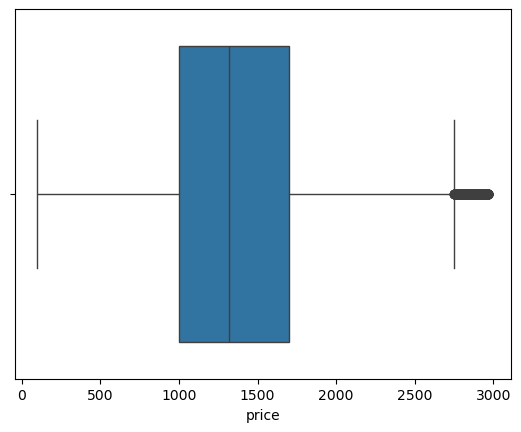

In [201]:
Q1 = data["price"].quantile(0.25)
Q3 = data["price"].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)

cleaned_data = data[(data["price"] >= lower_bound) & (data["price"] <= upper_bound)]
sns.boxplot(x=cleaned_data["price"])
plt.show()



<div dir=rtl>
<font face="B Nazanin" size=4>
به طور مختصر توضیح دهید که روش IQR چگونه کار می‌کند.
</font>
</p>


<font face="B Nazanin">
<div dir=rtl>
<p align="justify">
<font size=4>
<b> <font color='#eb4034'> توضیحات پاسخ: </font></b>  لطفا اینجا بنویسید
</p>
</font>
</div>
</font>
<hr>

In [202]:
cleaned_data.shape

(94765, 16)

<div dir=rtl>
<h2>
<font face="B Nazanin" color="#0099cc">
کاوش در داده‌ها
</font>
</h3>


<div dir=rtl>
<h4>
<font face="B Nazanin">
<b>1. همبستگی </b>
</font>
</h4>
<div dir=rtl>
<font face="B Nazanin" size=4>
ماتریس همبستگی (Correlation Matrix) داده‌ها را در قالب یک Heatmap مصور کنید.
</font>
</p>


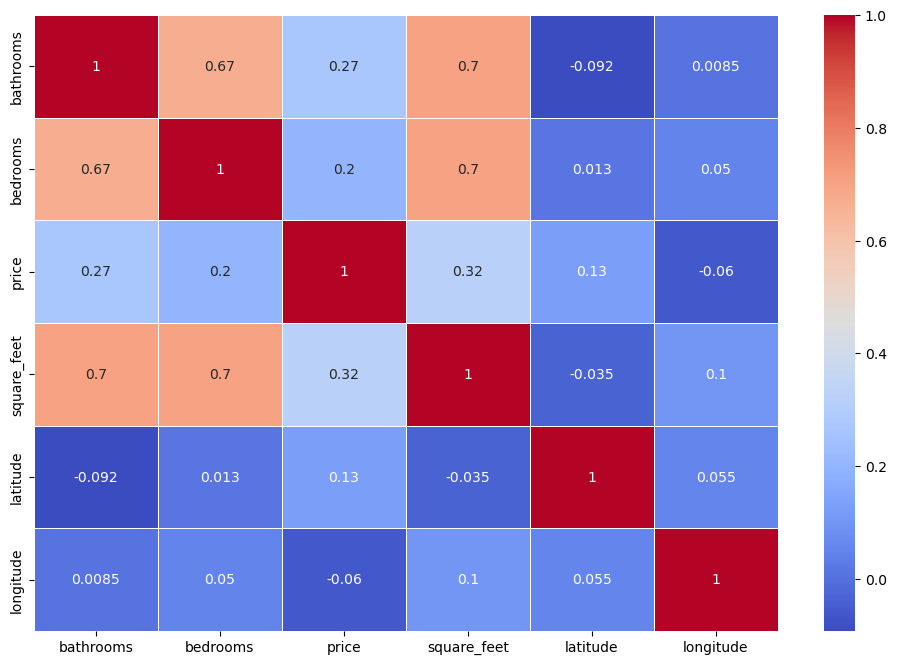

In [203]:
numeric_cleaned_data = cleaned_data.select_dtypes(include=['float64', 'int64'])
corr_matrix = numeric_cleaned_data.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.show()

<div dir=rtl>
<font face="B Nazanin" size=4>
درمورد نمودار Heatmap و عملکرد آن به طور مختصر توضیح دهید. همچنین تحلیل خود از ویژگی‌هایی که همبستگی بالایی داشتد را نیز به طور خلاصه بنویسید.
</font>
</p>


<font face="B Nazanin">
<div dir=rtl>
<p align="justify">
<font size=4>
<b> <font color='#eb4034'> توضیحات پاسخ: </font></b>  لطفا اینجا بنویسید
</p>
</font>
</div>
</font>
<hr>

<div dir=rtl>
<h4>
<font face="B Nazanin">
<b>2. تاثیر ایالت بر قیمت </b>
</font>
</h4>

<div dir=rtl>
<font face="B Nazanin" size=4>
در این مجموعه داده، قیمت اجاره و متراژ هر خانه مشخص شده‌است،
اما قیمت اجارهٔ هر فوت مربع خانه مشخص نیست. در ستون
<code>pps</code>
قیمت اجاره خانه‌ها را به ازای هر فوت مربع محاسبه و ذخیره کنید.
</font>
</p>

In [204]:
cleaned_data["pps"] = cleaned_data["price"] / cleaned_data["square_feet"]
cleaned_data.head()

/tmp/ipykernel_31973/4190486530.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data["pps"] = cleaned_data["price"] / cleaned_data["square_feet"]


,amenities,bathrooms,bedrooms,fee,has_photo,pets_allowed,price,square_feet,cityname,state,latitude,longitude,source,day,month,year,pps
0,"AC,Cable or Satellite,Clubhouse,Dishwasher,Gat...",1.0,1.0,No,Thumbnail,"Cats,Dogs",337.0,617,Victoria,TX,28.696040,-97.164089,RentDigs.com,17,1,2019,0.546191
1,"Parking,Patio/Deck,Pool,Washer Dryer",1.0,1.0,No,Yes,"Cats,Dogs",1284.0,728,Dallas,TX,32.851338,-96.817635,RentDigs.com,17,9,2019,1.763736
2,"Fireplace,Gym,Pool,Tennis,Washer Dryer",1.0,1.0,No,Thumbnail,"Cats,Dogs",923.0,510,Richmond,VA,37.530061,-77.476208,RentDigs.com,17,9,2019,1.809804
3,none advertised,2.0,4.0,No,Yes,no,1595.0,1950,Loganville,GA,33.795894,-83.877143,RentDigs.com,18,9,2019,0.817949
4,"Dishwasher,Garbage Disposal,Parking,Refrigerat...",2.0,3.0,No,Yes,"Cats,Dogs",2000.0,1600,Chicago,IL,42.005037,-87.681448,RentDigs.com,8,12,2018,1.250000


<div dir=rtl>
<font face="B Nazanin" size=4>
حال می‌خواهیم 10 ایالت با بیشترین میانگین قیمت اجاره بر حسب فوت مربع را بررسی کنیم. این ایالت‌ها را به ترتیب نزولی میانگین قیمت اجاره بر حسب فوت مربع با استفاده از barplot نمایش دهید کنید.
</font>
</p>


<div dir=rtl>
<font face="B Nazanin" size=4>
 می‌توانید از توابع <code>groupby</code> و <code>sort_values</code> استفاده کنید.
</font>
</p>


/tmp/ipykernel_31973/3900739322.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='pps', y='state', data=top_10, palette='Blues_d')


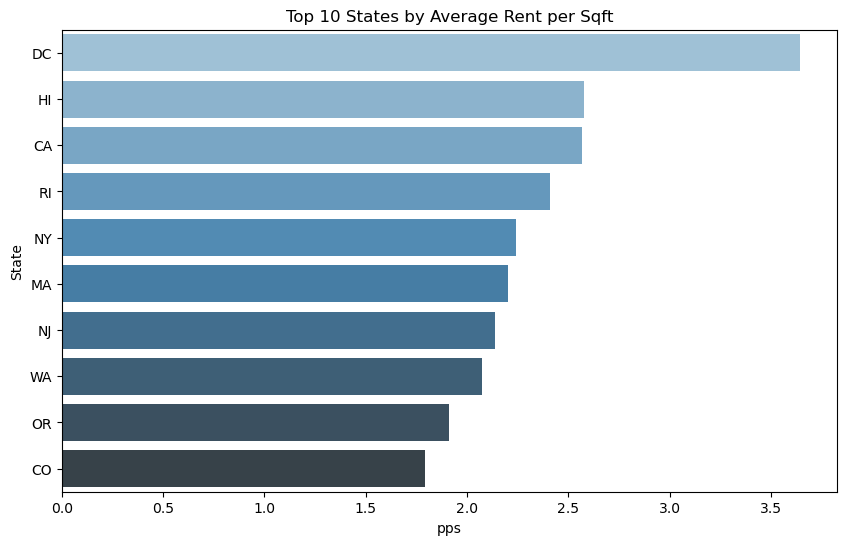

In [205]:
mean_rent_by_state = cleaned_data.groupby("state")["pps"].mean().reset_index()
top_10 = mean_rent_by_state.sort_values(by="pps", ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x='pps', y='state', data=top_10, palette='Blues_d')
plt.title('Top 10 States by Average Rent per Sqft')
plt.xlabel('pps')
plt.ylabel('State')
plt.show()



<div dir=rtl>
<h4>
<font face="B Nazanin">
<b>3. تاثیر فاصله از مرکز شهر بر قیمت </b>
</font>
</h4>

<div dir=rtl>
<font face="B Nazanin" size=4>
در ادامه می‌خواهیم بررسی کنیم که تاثیر فاصله خانه از مرکز شهر بر قیمت اجاره هر فوت مربع خانه چگونه است. بدین منظور شهر دالاس را بررسی خواهیم کرد. ابتدا خانه‌هایی که در شهر دالاس قرار دارند را در یک دیتافریم جدید ذخیره کنید.
</font>
</p>

In [206]:
dallas = cleaned_data[(cleaned_data["cityname"]=="Dallas")]
dallas.head()


,amenities,bathrooms,bedrooms,fee,has_photo,pets_allowed,price,square_feet,cityname,state,latitude,longitude,source,day,month,year,pps
1,"Parking,Patio/Deck,Pool,Washer Dryer",1.0,1.0,No,Yes,"Cats,Dogs",1284.0,728,Dallas,TX,32.851338,-96.817635,RentDigs.com,17,9,2019,1.763736
23,"AC,Dishwasher,Fireplace,Gated,Gym,Patio/Deck,Pool",1.0,1.0,No,Thumbnail,"Cats,Dogs",890.0,558,Dallas,TX,32.867726,-96.806847,RentDigs.com,17,9,2019,1.594982
41,Pool,1.0,1.0,No,Thumbnail,no,1534.0,688,Dallas,TX,32.832278,-96.818930,RentDigs.com,17,9,2019,2.229651
71,"AC,Cable or Satellite,Dishwasher,Fireplace,Pat...",2.0,2.0,No,Thumbnail,"Cats,Dogs",860.0,945,Dallas,TX,32.799549,-96.709635,RentDigs.com,17,9,2019,0.910053
132,none advertised,2.0,2.0,No,Yes,no,1831.0,1076,Dallas,TX,32.934477,-96.849276,RentDigs.com,17,9,2019,1.701673


<div dir=rtl>
<font face="B Nazanin" size=4>
با داشتن طول و عرض جغرافیایی خانه‌ها و استفاده از نمودار پراکندگی (Scatter plot) می‌توانیم بررسی را انجام دهیم.
رنگ هر نقطه باید نشان دهنده قیمت اجاره هر فوت مربع خانه باشد و نوار رنگ نشان دهنده قیمت‌های متانظر با طیف رنگی نیز باید در کنار نمودار نمایش داده شود. مختصات مرکز شهر دالاس در زیر آمده است. مرکز شهر را نیز با یک نقطه در نمودار نمایش دهید.
</font>
</p>


$$\text{latitude: } 32.77653 $$
$$\text{longitude: } -96.79708 $$

<div dir=rtl>
<font face="B Nazanin" size=4>
از آنجایی که تعداد نقاط زیاد است، بهتر است سایز نقاط را برابر با 10 قرار دهید تا نقاط بهتر نمایش داده شوند
</font>
</p>


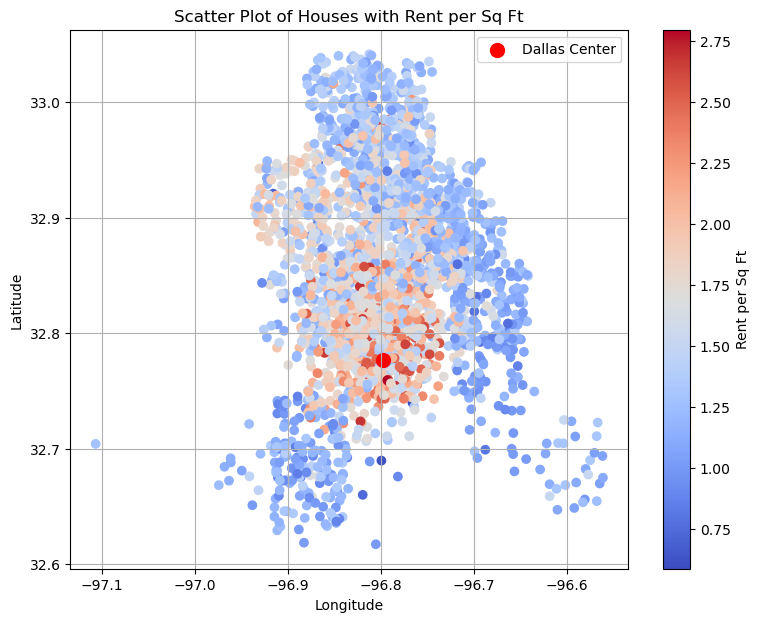

In [207]:
fig, ax = plt.subplots(figsize = (9, 7)) #use this figure and axis to draw plot
dallas_center = (32.77653, -96.79798)
scatter = ax.scatter(dallas["longitude"], dallas["latitude"], c=dallas["pps"], alpha = 1, cmap="coolwarm")
cbar = fig.colorbar(scatter, ax=ax)
cbar.set_label('Rent per Sq Ft')
ax.scatter(dallas_center[1], dallas_center[0], color='red', s=100, label='Dallas Center')
ax.set_title('Scatter Plot of Houses with Rent per Sq Ft')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.legend()
ax.grid(True)
plt.show()


<div dir=rtl>
<font face="B Nazanin" size=4>
می‌توان عکس این منطقه از جهان را پشت نقاط رسم شده قرار داد تا دیدی واقعی‌تر نسبت به محل قرار‌گیری خانه‌ها به‌دست آوریم. با استفاده از محدوده‌ی محور افقی و عمودی نمودار، محدوده‌ی مورد نظر را با استفاده از نقشه‌های گوگل دریافت کرده‌ایم که در عکس <code>dallas.png</code>  ذخیره شده است. با استفاده از متد <code>imshow</code> این عکس را پشت نمودار قرار می‌دهیم.
خروجی مورد انتظار این تصویر است:
</font>
</p>


<p style="text-align:center;"><img src="./images/expected.png" alt="dallas_plot"></p>

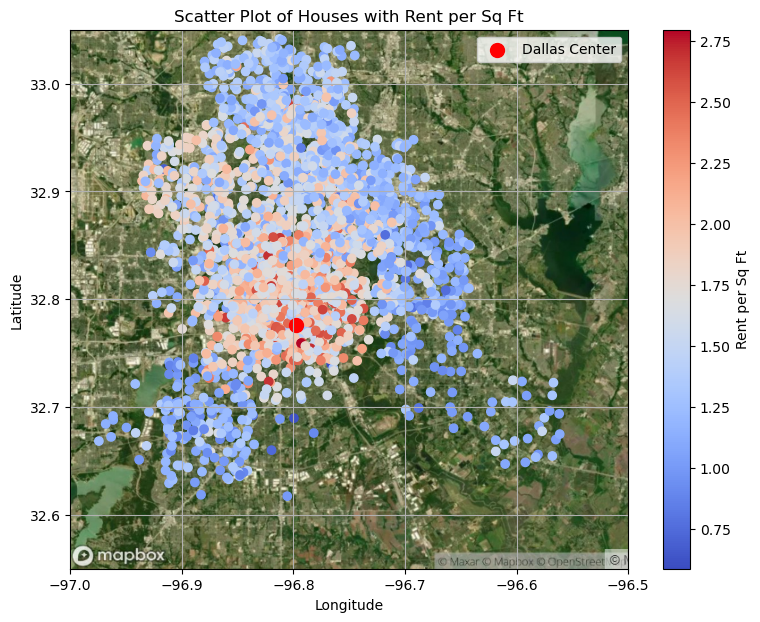

In [208]:
import matplotlib.image as mpimg
img = mpimg.imread('dallas.png')
ax.imshow(img, extent=[-97, -96.5, 32.55, 33.05], aspect='auto')
fig

<div dir=rtl>
<font face="B Nazanin" size=4>
برداشت خود را در رابطه با تاثیر فاصله خانه از مرکز شهر بر قیمت اجاره هر فوت مربع خانه بنویسید.
</font>
</p>


<font face="B Nazanin">
<div dir=rtl>
<p align="justify">
<font size=4>
<b> <font color='#eb4034'> توضیحات پاسخ: </font></b>  لطفا اینجا بنویسید
</p>
</font>
</div>
</font>
<hr>

<div dir=rtl>
<h4>
<font face="B Nazanin">
<b>4. تاثیر شهر بر قیمت </b>
</font>
</h4>


<div dir=rtl>
<font face="B Nazanin" size=4>
در این بخش می‌خواهیم بررسی کنیم که در شهرهای مختلف یک ایالت قیمت اجاره هر فوت مربع خانه چگونه است. بدین منظور ایالت کالیفرنیا را بررسی خواهیم کرد. ابتدا خانه‌هایی که در این ایالت قرار دارند را در یک دیتافریم جدید ذخیره کنید.
</font>
</p>

In [209]:
CA = cleaned_data[(cleaned_data["state"]=="CA")]
CA.shape

(8161, 17)

<div dir=rtl>
<font face="B Nazanin" size=4>
به منظور نمایش بهتر داده‌ها در نمودار با استفاده از روش IQR با ضریب 1.5 داده‌های پرت را بر حسب ستون <code>pps</code> حذف کنید.
</font>
</p>

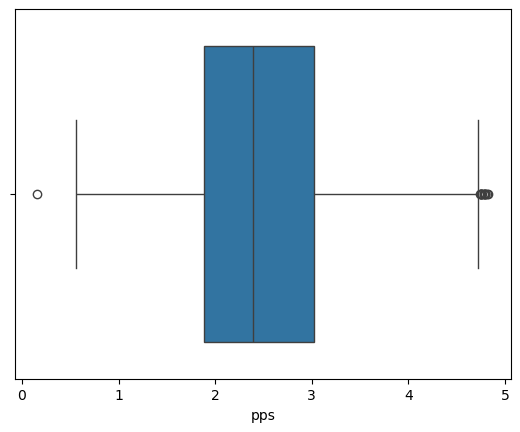

In [210]:
Q1 = CA["pps"].quantile(0.25)
Q3 = CA["pps"].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)


CA = CA[(CA["pps"] >= lower_bound) & (CA["pps"] <= upper_bound)]
sns.boxplot(x=CA["pps"])
plt.show()

<div dir=rtl>
<font face="B Nazanin" size=4>
حال با نمودار Scatter plot مشابه بخش قبل داده‌ها را نمایش دهید.
تصویر <code>CA.png</code> شامل نقشه بخشی از ایالت کالیفرنیا می‌باشد که محدوده آن در زیر آمده است.
</font>
</p>

$$\text{latitude: } 33.0391 \rightarrow 38.7586$$
$$\text{longitude: }-123.6021 \rightarrow  -116.5354$$

<div dir=rtl>
<font face="B Nazanin" size=4>
توجه شود که در این بخش علاوه بر مشخص کردن محدوده تصویر، محدوده کلی نمودار را نیز باید به مختصات‌های گفته شده محدود کنید زیرا داده‌های ما شامل تمام داده‌های ایالت کالیفرنیا می‌باشد و در صورتی که محدوده نمودار مشخص نشود، داده‌های خارج از محدوده نقشه نیز نمایش داده خواهند شد.
</font>
</p>


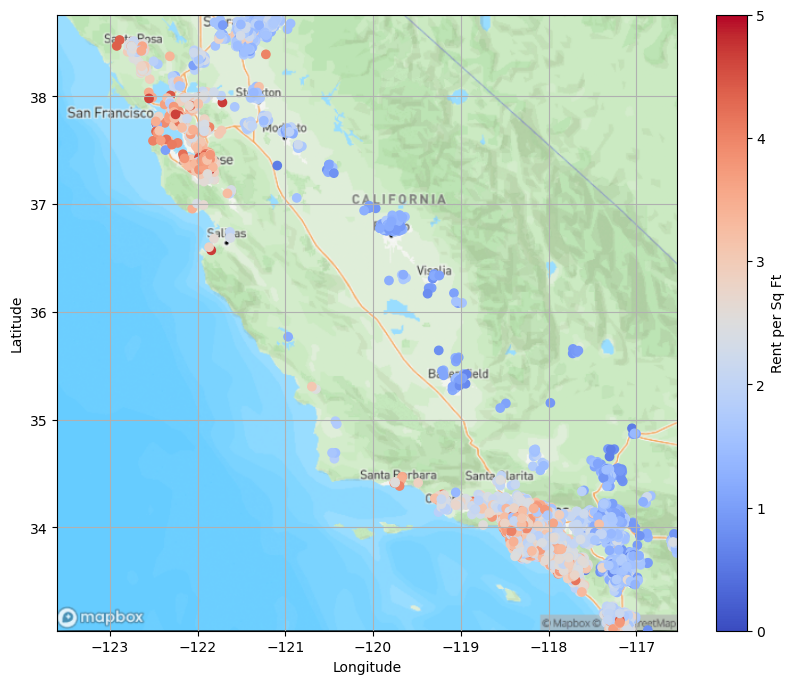

In [211]:
fig, ax = plt.subplots(figsize = (10, 8)) #use this figure and axis to draw plot
CA = CA[(CA["latitude"] >= 33.0391) & (CA["latitude"] <= 38.7586)]
CA = CA[(CA["longitude"] >= -123.6021) & (CA["longitude"] <= -116.5354)]
scatter = ax.scatter(CA["longitude"], CA["latitude"], c=CA["pps"], alpha = 1, cmap="coolwarm", vmin = 0, vmax = 5)
cbar = fig.colorbar(scatter, ax=ax)
cbar.set_label('Rent per Sq Ft')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.grid(True)

img = mpimg.imread('CA.png')
ax.imshow(img, extent=[-123.6021, -116.5354, 33.0391, 38.7586], aspect='auto')
fig
plt.show()


<div dir=rtl>
<font face="B Nazanin" size=4>
برداشت خود را در رابطه با تاثیر شهر بر قیمت اجاره هر فوت مربع خانه بنویسید.
</font>
</p>


<font face="B Nazanin">
<div dir=rtl>
<p align="justify">
<font size=4>
<b> <font color='#eb4034'> توضیحات پاسخ: </font></b>  لطفا اینجا بنویسید
</p>
</font>
</div>
</font>
<hr>

<div dir=rtl>
<h4>
<font face="B Nazanin">
<b>5. رابطه بین متراژ و قیمت </b>
</font>
</h4>


<div dir=rtl>
<font face="B Nazanin" size=4>
با استفاده از نمودار توام (Joint plot) رابطه بین متراژ خانه و قیمت اجاره خانه در شهر دالاس را بررسی کنید.
</font>
</p>

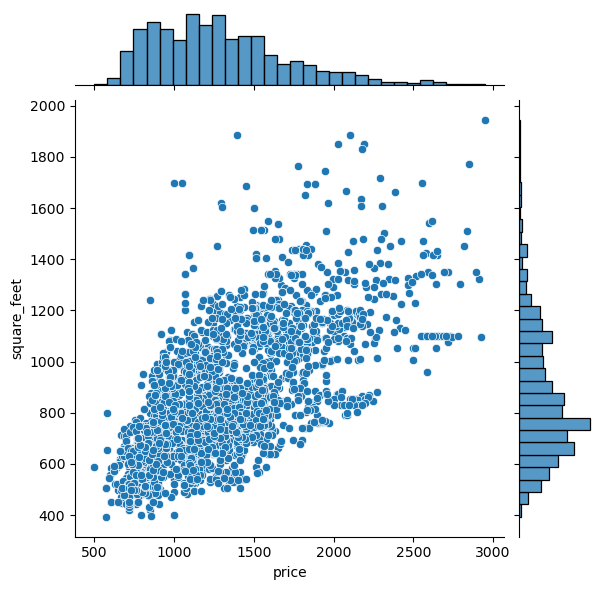

In [212]:
sns.jointplot(data=dallas, x="price", y="square_feet")
plt.show()

<div dir=rtl>
<font face="B Nazanin" size=4>
برداشت شما از نمودار چیست؟ همچنین در رابطه با نحوه‌ی رسم این نمودار و کاربرد‌های آن توضیح دهید.
</font>
</p>


<font face="B Nazanin">
<div dir=rtl>
<p align="justify">
<font size=4>
<b> <font color='#eb4034'> توضیحات پاسخ: </font></b>  لطفا اینجا بنویسید
</p>
</font>
</div>
</font>
<hr>

<div dir=rtl>
<h4>
<font face="B Nazanin">
<b>6. تاثیر آسانسور بر قیمت</b>
</font>
</h4>


<div dir=rtl>
<font face="B Nazanin" size=4>
در این بخش می‌خواهیم تاثیر آسانسور بر قیمت اجاره خانه را بررسی کنیم. با نمودار Kdeplot توزیع قیمت اجاره خانه‌هایی که دارای آسانسور هستند و خانه‌هایی که آسانسور ندارند را بررسی کنید.
<br>
وجود یا عدم وجود آسانسور باید از ستون <code>amenities</code> استخراج شود. در صورتی که خانه‌ای دارای آسانسور باشد در ستون <code>amenities</code> عبارت <code>Elevator</code> وجود دارد.
</font>
</p>


<div dir=rtl>
<font face="B Nazanin" size=4>
نمودار Kdeplot هر دو دسته را در یک Axes نمایش دهید.
</font>
</p>


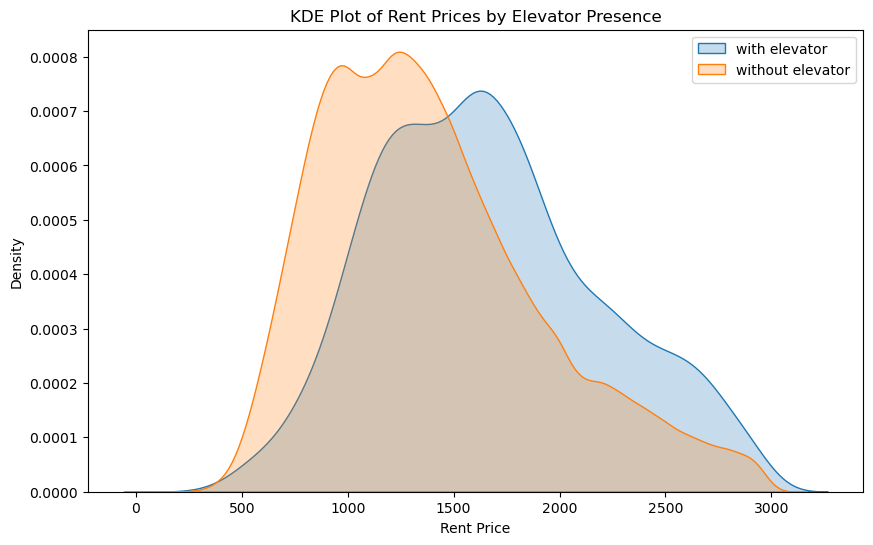

In [213]:
fig, ax = plt.subplots(figsize=(10, 6)) #use this figure and axis to draw plot
elevator_homes = cleaned_data[cleaned_data["amenities"].str.contains("Elevator", na=False)]
no_elevator_homes = cleaned_data[~cleaned_data["amenities"].str.contains("Elevator", na=False)]
sns.kdeplot(elevator_homes["price"], label="with elevator", ax=ax,fill=True)
sns.kdeplot(no_elevator_homes["price"], label="without elevator", ax=ax, fill=True)
ax.set_title('KDE Plot of Rent Prices by Elevator Presence')
ax.set_xlabel('Rent Price')
ax.set_ylabel('Density')
ax.legend()
plt.show()


<div dir=rtl>
<font face="B Nazanin" size=4>
برداشت خود را در رابطه با تاثیر آسانسور بر قیمت اجاره خانه بنویسید.
</font>
</p>


<font face="B Nazanin">
<div dir=rtl>
<p align="justify">
<font size=4>
<b> <font color='#eb4034'> توضیحات پاسخ: </font></b>  لطفا اینجا بنویسید
</p>
</font>
</div>
</font>
<hr>

<div dir=rtl>
<h4>
<font face="B Nazanin">
<b>7. بررسی توزیع قیمت</b>
</font>
</h4>


<div dir=rtl>
<font face="B Nazanin" size=4>
در این بخش می‌خواهیم توزیع قیمت اجاره خانه‌ها در دو ایالت واشنگتون و تگزاس را بررسی کنیم. برای این کار ابتدا خانه‌هایی که در این دو ایالت قرار دارند را در یک دیتافریم جدید ذخیره کنید و سپس با نمودار ویالنی (Violin plot) توزیع قیمت اجاره خانه‌ها را برای این دو ایالت نمایش دهید.
</font>
</p>


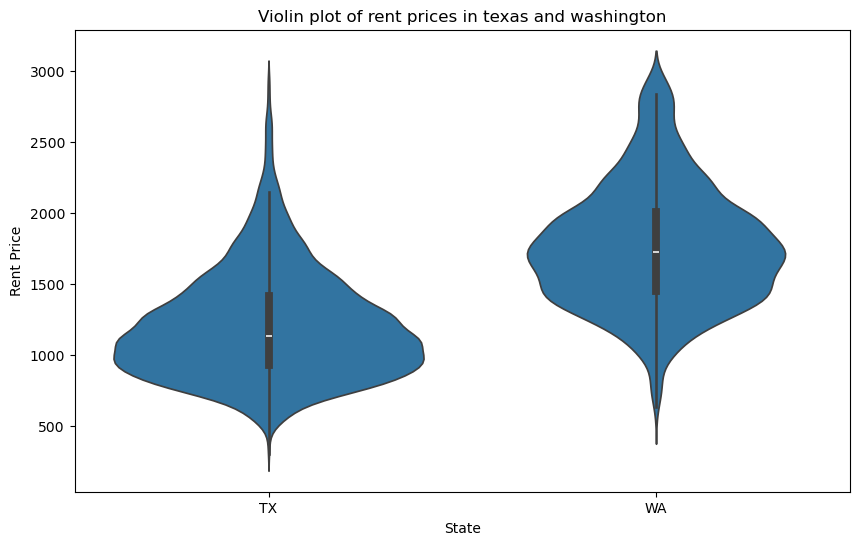

In [214]:
filtered_df = cleaned_data[(cleaned_data["state"]=="TX") | (cleaned_data["state"]=="WA")]

fig, ax = plt.subplots(figsize=(10, 6)) #use this figure and axis to draw plot
sns.violinplot(data=filtered_df, x="state", y="price", ax=ax)
ax.set_title("Violin plot of rent prices in texas and washington")
ax.set_xlabel("State")
ax.set_ylabel("Rent Price")
plt.show()

<div dir=rtl>
<font face="B Nazanin" size=4>
تحلیل خود از نمودار را بنویسید. همچنین توضیح دهید که نمودار ویالنی برای تحلیل بصری در چه مواقعی مناسب است.
</font>
</p>


<font face="B Nazanin">
<div dir=rtl>
<p align="justify">
<font size=4>
<b> <font color='#eb4034'> توضیحات پاسخ: </font></b>  لطفا اینجا بنویسید
</p>
</font>
</div>
</font>
<hr>

<div dir=rtl>
<h4>
<font face="B Nazanin">
<b>8. تاثیر استاندارد سازی</b>
</font>
</h4>


<div dir=rtl>
<font face="B Nazanin" size=4>
در این بخش می‌خواهیم تاثیر استاندارد سازی بر ویژگی‌ها را بررسی کنیم. در تصویر زیر نمودار پراکندگی برای دو ویژگی <code>price</code> و <code>bedrooms</code> رسم شده است.
همانطور که مشاهده می‌کنید در صورتی که بازه نمودار در هر دو محور را یکسان در نظر بگیریم، اطلاعات مفیدی از نمودار قابل برداشت نمی‌باشد.
<br>
یک کپی از دیتافریم بگیرید و در دیتافریم جدید این دو ویژگی را استاندارد کنید و سپس نمودار را مجددا رسم کنید.
</font>
</p>
<p style="text-align:center;"><img src="./images/scatter.png" alt="Scatter Plot", width=700></p>


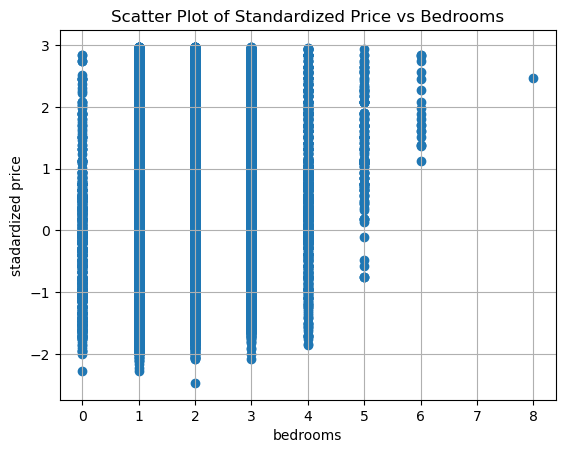

In [215]:
data_copy = cleaned_data.copy()
mean_price = data_copy["price"].mean()
std_price = data_copy["price"].std()
data_copy["price_standardized"] = (data_copy["price"] - mean_price) / std_price
plt.scatter(data_copy['bedrooms'], data_copy['price_standardized'])
plt.xlabel('bedrooms')
plt.ylabel('stadardized price')
plt.title('Scatter Plot of Standardized Price vs Bedrooms')
plt.grid(True)
plt.show()

<div dir=rtl>
<font face="B Nazanin" size=4>
استاندارد سازی چه تاثیری بر نمودار داشت؟ همچنین به طور مختصر بررسی کنید که استاندارد‌سازی ویژگی‌ها چگونه می‌تواند باعث بهبود الگوریتم‌های یادگیری ماشین شود.
</font>
</p>


<font face="B Nazanin">
<div dir=rtl>
<p align="justify">
<font size=4>
<b> <font color='#eb4034'> توضیحات پاسخ: </font></b>  لطفا اینجا بنویسید
</p>
</font>
</div>
</font>
<hr>

<div dir=rtl>
<h2>
<font face="B Nazanin" color="#0099cc">
بخش امتیازی

<div dir=rtl>
<font face="B Nazanin" size=4>
<b> <font color='#eb4034'> تذکر: </font></b>
برای دریافت نمره‌ی امتیازی، تنها کافیست به یکی از دو مورد (الف) یا (ب) پاسخ دهید. پاسخ‌دهی به هر دو سوال نمره‌ی مازاد نخواهد داشت.

<div dir=rtl>
<font face="B Nazanin" size=4>
الف) در مورد مفاهیم کشیدگی (Kurtosis) و چولگی (Skewness) حول توزیع‌های آماری مطالعه کنید و به دو سوال زیر پاسخ دهید:
<ol>
  <li>
    این معیار‌ها به بررسی چه خواصی از یک توزیع آماری کمک می‌کنند؟
  </li>
  <li>
  در مورد توزیع نرمال به خصوص، چگونه می‌توان بدون بررسی مستقیم نمودار و با استفاده از معیار‌های آماری ساده، شکل چولگی نمودار را تشخیص داد؟
  شکل چولگی ویژگی <code>price</code> را بر این اساس حدس بزنید و حدس خود را با رسم نمودار تایید کنید.
  </li>
</ol>
</font>
</p>


<div dir=rtl>
<font face="B Nazanin" size=4>
ب) در مورد روش حذف مقادیر پرت به کمک معیار Z-score مطالعه کنید.
     برای ویژگی <code>price</code> قبل‌تر از طریق روش IQR مقادیر پرت را حذف کرده بودیم، این بار با استفاده از روش Z-score مقادیر پرت را با آستانه Z = ±3
     حذف کنید.
     برای حذف مقادیر پرت، از توابع آماده‌ای که مستقیما Z-score را محاسبه می‌کنند استفاده نکنید.
</div>
</font>


In [216]:
mean_price = data["price"].mean()
std_price = data["price"].std()
data["z_score"] = (data["price"] - mean_price) / std_price
new_cleaned_data = data[(data["z_score"] <= 3 ) & (data["z_score"] >= -3)]
new_cleaned_data = new_cleaned_data.drop(columns=["z_score"])
data = data.drop(columns=["z_score"])
new_cleaned_data

/tmp/ipykernel_31973/3934876739.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["z_score"] = (data["price"] - mean_price) / std_price


,amenities,bathrooms,bedrooms,fee,has_photo,pets_allowed,price,square_feet,cityname,state,latitude,longitude,source,day,month,year
0,"AC,Cable or Satellite,Clubhouse,Dishwasher,Gat...",1.0,1.0,No,Thumbnail,"Cats,Dogs",337.0,617,Victoria,TX,28.696040,-97.164089,RentDigs.com,17,1,2019
1,"Parking,Patio/Deck,Pool,Washer Dryer",1.0,1.0,No,Yes,"Cats,Dogs",1284.0,728,Dallas,TX,32.851338,-96.817635,RentDigs.com,17,9,2019
2,"Fireplace,Gym,Pool,Tennis,Washer Dryer",1.0,1.0,No,Thumbnail,"Cats,Dogs",923.0,510,Richmond,VA,37.530061,-77.476208,RentDigs.com,17,9,2019
3,none advertised,2.0,4.0,No,Yes,no,1595.0,1950,Loganville,GA,33.795894,-83.877143,RentDigs.com,18,9,2019
4,"Dishwasher,Garbage Disposal,Parking,Refrigerat...",2.0,3.0,No,Yes,"Cats,Dogs",2000.0,1600,Chicago,IL,42.005037,-87.681448,RentDigs.com,8,12,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99782,"Cable or Satellite,Internet Access,TV",1.0,0.0,No,Thumbnail,no,1200.0,389,Los Angeles,CA,34.083269,-118.303425,RentDigs.com,22,2,2019
99783,"Clubhouse,Gym,Internet Access,Parking,Pool,Sto...",2.0,2.0,No,Yes,no,765.0,1053,Lynchburg,VA,37.333672,-79.218679,RentDigs.com,22,2,2019
99784,none advertised,1.0,1.0,No,Thumbnail,"Cats,Dogs",1245.0,635,Atlanta,GA,33.727126,-84.381276,RentDigs.com,22,2,2019
99785,"Gym,Pool,Storage",1.0,1.0,No,Thumbnail,no,2394.0,948,Arlington,VA,38.861943,-77.072875,RentDigs.com,22,2,2019


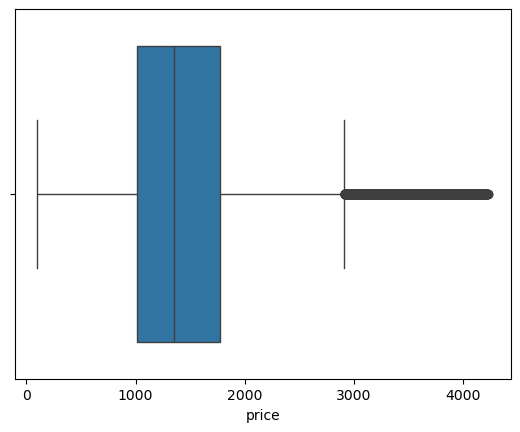

In [217]:

sns.boxplot(x=new_cleaned_data["price"])
plt.show()

In [218]:
print(new_cleaned_data.shape, cleaned_data.shape, data.shape)

(98398, 16) (94765, 17) (99399, 16)
